<a href="https://colab.research.google.com/github/Ashish-17CSE/Deep_Learning/blob/master/DL_Assignment_1_MNIST_Classification_Using_Softmax_Logistic_Regres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, y_test.shape, x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000,) (10000, 28, 28)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


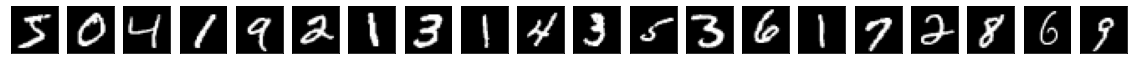

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

n = 20
plt.figure(figsize=(20, 3))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

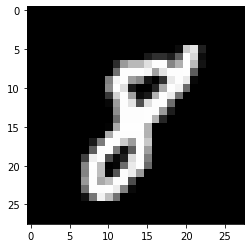

In [ ]:
X1_train = x_train.astype('float32')/255
X1_test = x_test.astype('float32')/255
plt.imshow(X1_train[17].reshape(28,28))

In [ ]:
num_features = 784 # 28*28
num_labels = 10
learning_rate = 0.01

In [ ]:
from keras.utils.np_utils import to_categorical
X1_train = X1_train.T
X1_test = X1_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T
print(X1_train.shape)
print(Y_train.shape)
print(X1_test.shape)
print(Y_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [ ]:
def initialize_parameters(dim):
    np.random.seed(1)
    parameters = {}
    parameters['W'] = np.random.randn(10, dim)/np.sqrt(dim)
    parameters['b'] = np.zeros((10, 1))
   #parameters = {'W':W, 'b':b}
    return parameters

In [ ]:
def softmax(z):
    A = np.exp(z - np.max(z))
    soft_max = A/np.sum(axis = 0, keepdims = True) 
    return soft_max

In [ ]:
def forward(parameters, X, A, Y):
    w = parameters['W']
    b = parameters['b']
    A = softmax((np.dot(w.T, X)+b).T)
    m = X.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-9))
    return A, cost

In [ ]:
def backprop(X, Y, A):
    m = Y.shape[1]
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db

In [ ]:
def optimise(parameters, X, Y, num_iterations, learning_rate):
    w = parameters["W"]
    b = parameters["b"]
    costs = []
    for i in range(num_iterations):
        A, cost = forward(parameters, X, Y)
        #cost = compute_cost(A, Y)
        dw, db = backprop(X, Y, A)

        parameters['W'] = parameters['W'] - l_rate * dw.T
        parameters['b'] = parameters['b'] - l_rate * db.T

        if i % 100 == 0:
            print('Cost on {} iteration: Cost: {}, Normalised Weight: {}, Bias: {}'.format(i, cost, np.linalg.norm(dw), db))
        
        costs.append(cost)
    return parameters, costs

In [ ]:
def predict(parameters, X, Y):
    w = parameters['W']
    print(w.shape,X.shape)
    probs = forward(parameters,X)
    y_hat = np.argmax(probs, axis=0)
    Y = np.argmax(Y, axis=0)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [ ]:
def model(dim, X_train, Y_train, X_test, Y_test, num_interation, learning_rate):
    parameters = initialize_parameters(dim)
    parameters, costs = optimise(parameters, X_train, Y_train, num_interation, learning_rate)
    return parameters, costs

In [ ]:
parameters, costs = model(784, X1_train, Y_train, X1_test, Y_test, 1000, learning_rate)

TypeError: ignored